In [1]:
# Import necessary libraries
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.model_selection import *
from sklearn.compose import *
from sklearn.svm import SVC
from sklearn.tree import *
from sklearn.model_selection import *
from sklearn.model_selection import *
from sklearn.discriminant_analysis import *
from sklearn.preprocessing import *
from sklearn.neighbors import *
from sklearn.naive_bayes import *
from sklearn.pipeline import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.linear_model import *
import os

warnings.simplefilter('ignore')

os.chdir('D:\Datasets')

glass = pd.read_csv('Glass.csv')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,building_windows_float_processed
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,headlamps
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,headlamps
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,headlamps
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,headlamps


# lable encoding

In [2]:
# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'Type' column in the 'glass' DataFrame using the LabelEncoder
glass['Type'] = le.fit_transform(glass['Type'])

# Assign the 'Type' column (the target variable) to 'y'
y = glass['Type']

# Assign the remaining columns (the features) to 'x'
x = glass.drop('Type', axis=1)

# encoded data

In [24]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,3
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,3
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,3
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,3


# grid search (hyperparameter tuning)

In [3]:
# Define the parameter grid for hyperparameter tuning
params = {
    'max_depth': [2, 5, 7, 10, 13, None],
    'min_samples_split': [2, 5, 7, 10, 13],
    'min_samples_leaf': [1, 5, 7, 0, 10, 13]
}

# Create a Stratified K-Fold cross-validation object with 5 splits, shuffling the data, and a random state of 24
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

# Create a Decision Tree Classifier with a random state of 24
dtc = DecisionTreeClassifier(random_state=24)

# Create a GridSearchCV object to perform cross-validation and hyperparameter tuning
# Use the Decision Tree Classifier as the estimator, the parameter grid defined above, the Stratified K-Fold cross-validation,
# and use the negative log loss as the scoring metric
gcv = GridSearchCV(dtc, param_grid=params, cv=kfold, scoring='neg_log_loss')

# Fit the GridSearchCV object to the entire dataset (x and y)
gcv.fit(x, y)

# Print the best parameters found by the GridSearchCV
print("Best Parameters:", gcv.best_params_)

# Print the best score (negative log loss) found by the GridSearchCV
print("Best Score:", gcv.best_score_)

Best Parameters: {'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Score: -1.8636519303042316


# best tree

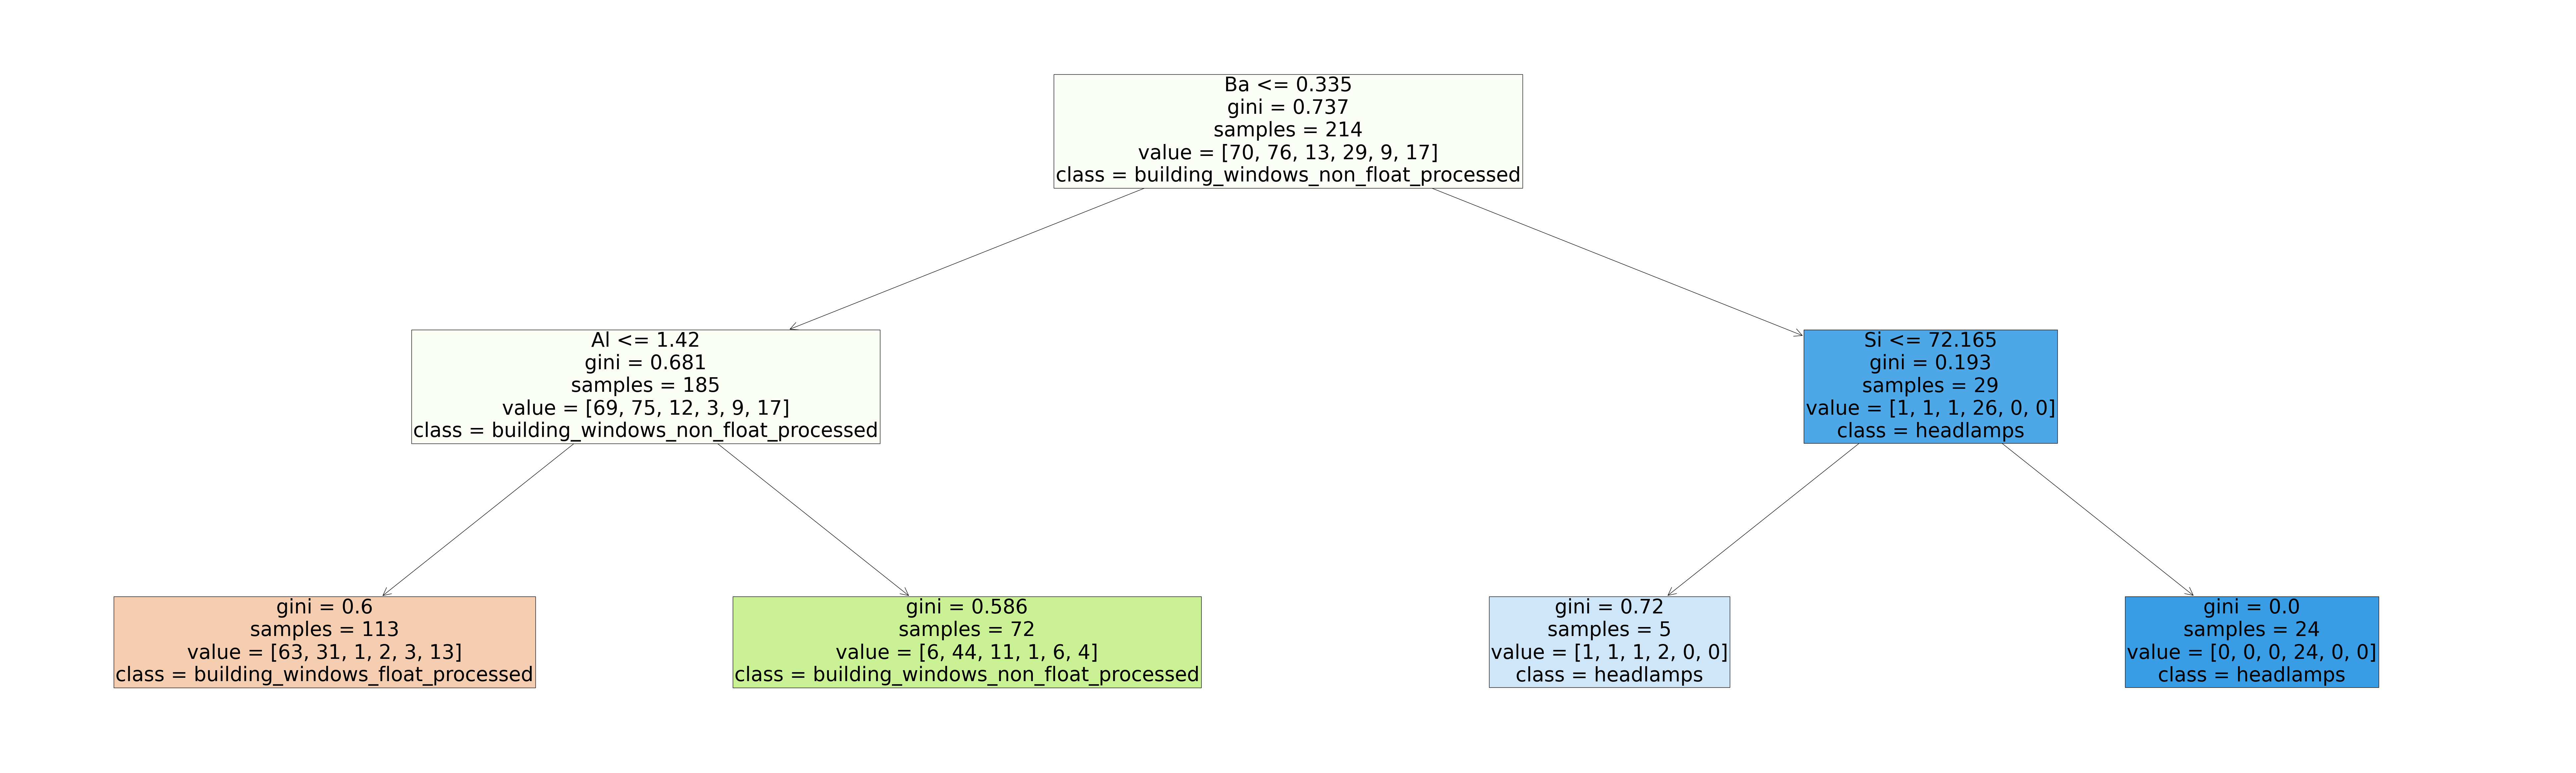

In [4]:
# Get the best estimator (Decision Tree Classifier) from the GridSearchCV
best_tree = gcv.best_estimator_

# Create a figure with a large size
plt.figure(figsize=(100, 30))

# Plot the decision tree using the plot_tree function from scikit-learn
plot_tree(best_tree,
          feature_names=x.columns,  # Use the column names from the feature matrix 'x'
          class_names=list(le.classes_),  # Use the class names from the LabelEncoder
          filled=True,  # Fill the nodes with colors
          fontsize=43)  # Set the font size for the text in the tree

# Display the plot
plt.show()

# importance 

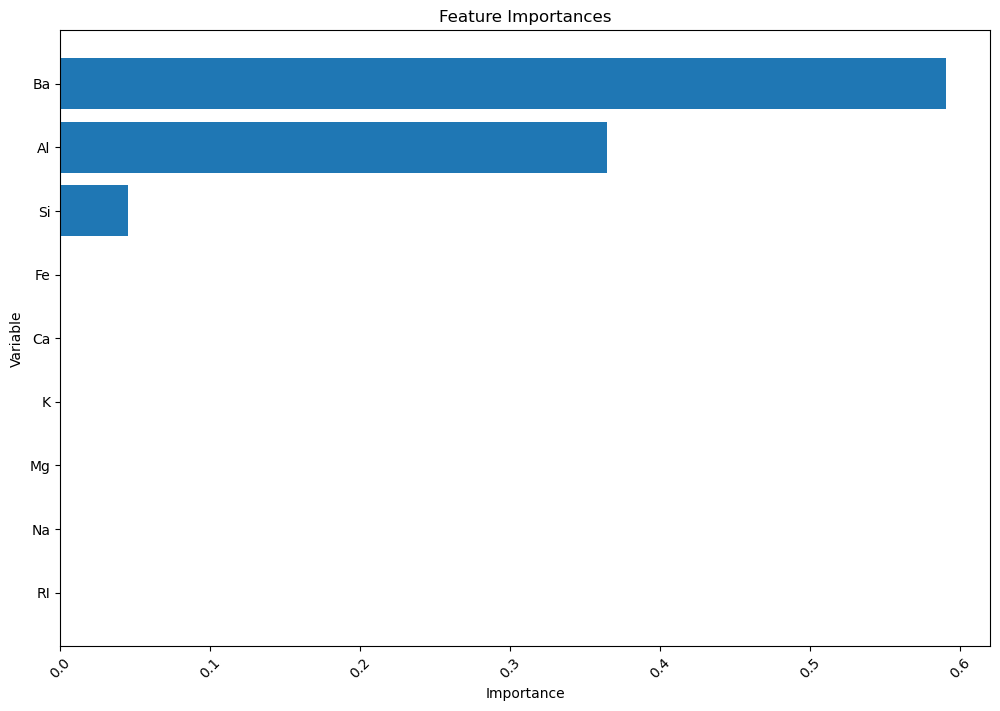

In [5]:
# Create a DataFrame with the feature names and their corresponding importances
pd_imp = pd.DataFrame({'var': list(x.columns), 'imp': best_tree.feature_importances_})

# Sort the DataFrame by the importance values in descending order
pd_imp.sort_values(by='imp', inplace=True)

# Create a horizontal bar plot of the feature importances
plt.figure(figsize=(12, 8))  # Set the figure size
plt.barh(pd_imp['var'], pd_imp['imp'])

# Add labels and title
plt.ylabel('Variable')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.xlabel('Importance')
plt.title('Feature Importances')

# Display the plot
plt.show()